# 27. 거스름돈
[문제 링크](https://www.acmicpc.net/problem/5585)

In [ ]:
# 동전 종류
coins = [500, 100, 50, 10, 5, 1]
# 받은 돈을 입력받고 거스름돈을 계산한다.
money = 1000 - int(input())
# 거스름돈의 개수를 저장할 변수
count = 0
for coin in coins:
    # 남은 돈을 현재의 돈전으로 나눈 몫과 나머지를 구한다.
    c, m = divmod(money, coin)
    # 거스름돈의 개수를 더한다.
    count += c
    # 나머지를 다시 거스름돈으로 계산한다.
    money = m

print(count)

## 성공
- 어렵지 않았음
- divmod를 통해 몫/나머지 한번에 계산

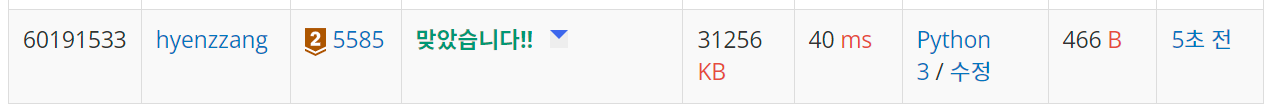

# 28. 전자레인지
[문제 링크](https://www.acmicpc.net/problem/10162)

In [ ]:
import sys
input = sys.stdin.readline
# 버튼 종류
buttons = [300, 60, 10]
# 버튼을 누른 횟수를 저장할 리스트
push_count = [0, 0, 0]
# 시간을 입력받는다.
time = int(input().rstrip())
# 버튼을 누른 횟수를 계산한다.
for i in range(3):
    c, t = divmod(time, buttons[i])
    push_count[i] = c
    time = t
# 시간이 0이면 버튼을 누른 횟수를 출력하고 아니면 -1을 출력한다.
print(*push_count, sep=' ') if time == 0 else print(-1)

## 성공
- 어렵지 않았음.
- 버튼별 누른 횟수를 저장할 리스트를 따로 만듬.

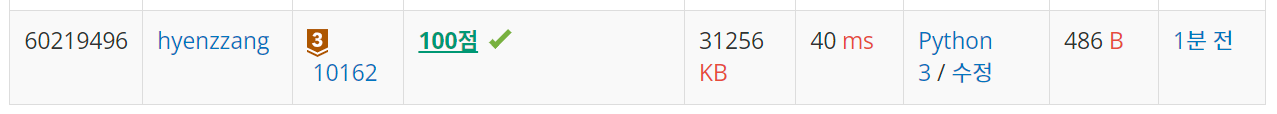

# 29. 체육복
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/42862)

In [ ]:
test = 1

def solution(n, lost, reserve):
    
    global test
    # print(f'테스트 케이스 {test}')
    test += 1
    
    answer = 0
    
    #혹시 모르니까 정렬
    lost.sort()
    reserve.sort()
    
    # 전체학생중 잃어버린 학생과 여벌 옷이 있는 학생을
    # 각각의 리스트에서 True로 표시 ->  옷을 여러개 가져올 수 있을거같아
    # 가지고 온 옷의 갯수를 표시로 변경
    lost_ = [0 for _ in range(n+1)]
    for v in lost:
        lost_[v] -= 1
            
    reserve_ = [0 for _ in range(n+1)]
    for v in reserve:
        reserve_[v] += 1
            
    # print(f'학생 수 : {n}')
    # print(f'잃어버린 학생 \t\t: {lost_[1:]}')
    # print(f'여벌 옷이 있는 학생 \t: {reserve_[1:]}')
    
    for i in range(1, n+1):
        # 잃어버린 사람 == 여벌 옷이 있는 사람
        if lost_[i] == -1 and reserve_[i] >= 1:
            lost_[i] += 1
            reserve_[i] -= 1
    
    for i in range(1, n+1):
        # 잃어버린 사람 and 여벌 옷이 있는 사람 - 1
        if lost_[i] == -1 and reserve_[i-1] >= 1:
            lost_[i] += 1
            reserve_[i-1] -= 1
        # 잃어버린 사람 and 여벌 옷이 있는 사람 + 1
        elif i < n:
            if lost_[i] == -1 and reserve_[i+1] >= 1:
                lost_[i] += 1
                reserve_[i+1] -= 1
    
    # print(f'여전히 옷이 없는 학생 : {sum(lost_[1:])}')
    # 아직 옷이없는 사람 수
    # 부족한 옷은 -1로 표시되어 있으므로
    # sum(lost_)를 통해 부족한 옷의 수를 구함
    answer = n + sum(lost_)
    
    return answer

## 성공
- 이전에 푼 문제

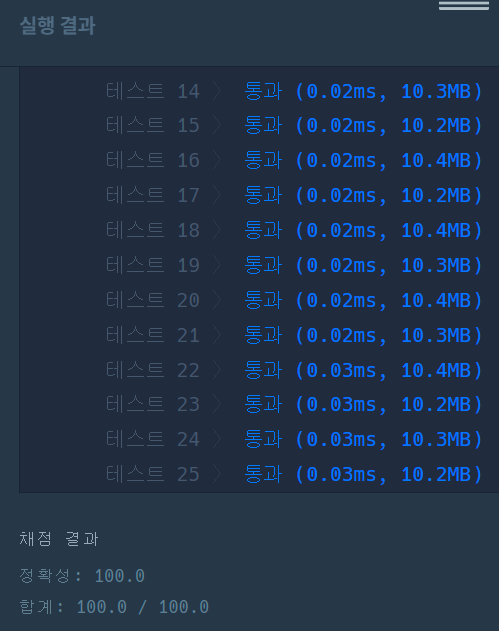

# 30. 회의실 배정
[문제 링크](https://www.acmicpc.net/problem/1931)

In [6]:
import sys
from queue import PriorityQueue
from collections import deque
# input = sys.stdin.readline
n = int(input().rstrip())
# 회의들의 정보를 저장할 우선순위 큐
# (회의 시작 시간, 회의 종료 시간) -> 시작 시간을 기준으로 정렬됨
meetings = PriorityQueue()
# 회의들의 정보를 입력받는다.
for _ in range(n):
    s, e = map(int, input().rstrip().split())
    meetings.put((s, e))
# 회의실들을 저장할 리스트
rooms = []
# 회의들을 처리한다.
while not meetings.empty():
    # 현재 회의를 가져온다.
    meeting = meetings.get()
    is_enter = False
    for room in rooms:
        # 현재 회의실이 비어있으면 회의를 넣는다.
        if room[-1][1] <= meeting[0]:
            room.append(meeting)
            # 회의실에 회의를 넣었음을 표시한다.
            is_enter = True
            break
    # 회의실에 회의를 넣지 못했으면 새로운 회의실을 만든다.
    if not is_enter:
        n_room = [meeting]
        rooms.append(n_room)
# print(rooms)
# 회의실의 개수를 출력한다.
print(len(rooms))

[[(1, 2), (9, 10)]]
1


## 실패
- 원인 확인 필요
    - 문제를 잘못이해
    - 최소한의 회의실 갯수를 구하는 것으로 착각.

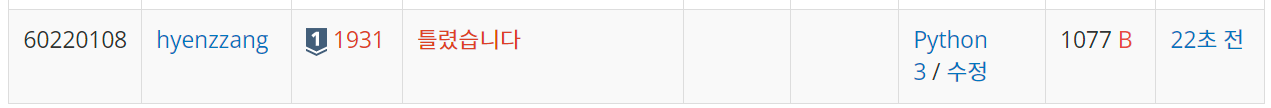

In [ ]:
import sys
from queue import PriorityQueue
from collections import deque
input = sys.stdin.readline
n = int(input().rstrip())
# 회의들의 정보를 저장할 우선순위 큐
# (회의 시작 시간, 회의 종료 시간) -> 시작 시간을 기준으로 정렬됨
meetings = PriorityQueue()
# 회의들의 정보를 입력받는다.
for _ in range(n):
    s, e = map(int, input().rstrip().split())
    meetings.put((s, e))
# 회의실들을 저장할 리스트
rooms = []
# 회의들을 처리한다.
while not meetings.empty():
    # 현재 회의를 가져온다. -> 이미 정렬되어있음
    meeting = meetings.get()
    for room in rooms:
        # 현재 회의실이 비어있으면 회의를 넣은 버전의 회의실을 만든다.
        if room[-1][1] <= meeting[0]:
            rooms.append(room + [meeting])
    # 새로운 회의실을 만든다.
    n_room = [meeting]
    rooms.append(n_room)
# print(rooms)
# 한 회의실에 들어있는 회의중 가장 많은 회의를 한 횟수를 확인한다.
result = max([len(room) for room in rooms])
# 회의실의 개수를 출력한다.
print(result)

In [12]:
import sys
import heapq
from queue import PriorityQueue
input = sys.stdin.readline
n = int(input().rstrip())
# 회의들의 정보를 저장할 우선순위 큐
# (회의 시작 시간, 회의 종료 시간) -> 시작 시간을 기준으로 정렬됨
meetings = PriorityQueue()
# 회의들의 정보를 입력받는다.
for _ in range(n):
    s, e = map(int, input().rstrip().split())
    meetings.put((s, e))
# 회의실들을 저장할 리스트(힙으로 정렬할것)
rooms = []
# 회의들을 처리한다.
while not meetings.empty():
    # 현재 회의를 가져온다. -> 이미 정렬되어있음
    meeting = meetings.get()
    for room in rooms:
        # 현재 회의실이 비어있으면 회의를 넣은 버전의 회의실을 만든다.
        if room[1] <= meeting[0]:
            heapq.heappush(rooms, [room[0]+1, meeting[1]])
        else:
            break
    # 새로운 회의실을 만든다.
    n_room = [1, meeting[1]]
    heapq.heappush(rooms, n_room)
# print(rooms)
# 한 회의실에 들어있는 회의중 가장 많은 회의를 한 횟수를 확인한다.
result = max([room[0] for room in rooms])
# 회의실의 개수를 출력한다.
print(result)

[[(0, 6)], [(1, 4)], [(2, 13)], [(3, 5)], [(3, 8)], [(1, 4), (5, 7)], [(3, 5), (5, 7)], [(5, 7)], [(1, 4), (5, 9)], [(3, 5), (5, 9)], [(5, 9)], [(0, 6), (6, 10)], [(1, 4), (6, 10)], [(3, 5), (6, 10)], [(6, 10)], [(0, 6), (8, 11)], [(1, 4), (8, 11)], [(3, 5), (8, 11)], [(3, 8), (8, 11)], [(1, 4), (5, 7), (8, 11)], [(3, 5), (5, 7), (8, 11)], [(5, 7), (8, 11)], [(8, 11)], [(0, 6), (8, 12)], [(1, 4), (8, 12)], [(3, 5), (8, 12)], [(3, 8), (8, 12)], [(1, 4), (5, 7), (8, 12)], [(3, 5), (5, 7), (8, 12)], [(5, 7), (8, 12)], [(8, 12)], [(0, 6), (12, 14)], [(1, 4), (12, 14)], [(3, 5), (12, 14)], [(3, 8), (12, 14)], [(1, 4), (5, 7), (12, 14)], [(3, 5), (5, 7), (12, 14)], [(5, 7), (12, 14)], [(1, 4), (5, 9), (12, 14)], [(3, 5), (5, 9), (12, 14)], [(5, 9), (12, 14)], [(0, 6), (6, 10), (12, 14)], [(1, 4), (6, 10), (12, 14)], [(3, 5), (6, 10), (12, 14)], [(6, 10), (12, 14)], [(0, 6), (8, 11), (12, 14)], [(1, 4), (8, 11), (12, 14)], [(3, 5), (8, 11), (12, 14)], [(3, 8), (8, 11), (12, 14)], [(1, 4), (5,

## 실패
- 시간초과
- 모든 회의실의 가능성을 확인하려 함
    - 너무 확인할 것이 많아짐 -> 시간복잡도 증가
    - 힙으로 구현해 모든 회의실을 확인 해볼 필요는 없게해봄
        - 메모리 초과오류 -> rooms가 너무 커짐

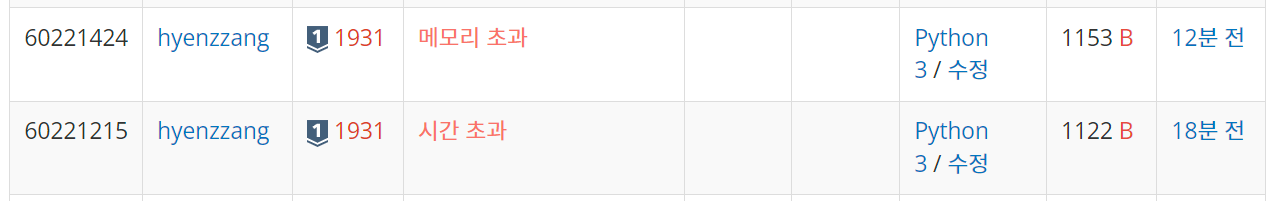

[(1, 2), (2, 1), (0, 3)]